dataset generation 


In [ ]:
import pandas as pd
import numpy as np
import random

# Fixed latitude and longitude for Hyderabad
latitude = 17.3850
longitude = 78.4867

# Define the disease conditions and time of day in 0-23 format
conditions = {
    "Healthy": {
        "Day-time (6am - 6pm)": {
            "Temperature (°C)": (22, 28),
            "Humidity (%)": (60, 80),
            "Nitrogen (g/kg)": (0.2, 0.6),
            "Phosphorus (mg/kg)": (20, 50),
            "Potassium (cmol/kg)": (0.2, 0.8),
            "pH": (5.5, 6.5),
            "Rainfall (mm)": (100, 200),  # Rainfall range
            "Time Range": (6, 18)  # Day-time: Hours 6-18
        },
        "Night-time (6pm - 6am)": {
            "Temperature (°C)": (18, 25),
            "Humidity (%)": (50, 70),
            "Nitrogen (g/kg)": (0.2, 0.6),
            "Phosphorus (mg/kg)": (20, 50),
            "Potassium (cmol/kg)": (0.2, 0.8),
            "pH": (5.5, 6.5),
            "Rainfall (mm)": (100, 200),  # Rainfall range
            "Time Range": (18, 6)  # Night-time: Hours 18-6
        }
    },
    "Rice Blast": {
        # Conditions for Rice Blast (both Day-time and Night-time)
    },
    "Sheath Blight": {
        # Conditions for Sheath Blight (both Day-time and Night-time)
    },
    "Suboptimal Growth": {
        # Conditions for Suboptimal Growth (both Day-time and Night-time)
    }
}

# Generate synthetic data
num_samples = 2000
synthetic_data = []

for _ in range(num_samples):
    # Randomly choose the disease condition and time of day
    disease_condition = random.choice(list(conditions.keys()))
    time_of_day = random.choice(list(conditions[disease_condition].keys()))

    temp_range = conditions[disease_condition][time_of_day]["Temperature (°C)"]
    humidity_range = conditions[disease_condition][time_of_day]["Humidity (%)"]
    nitrogen_range = conditions[disease_condition][time_of_day]["Nitrogen (g/kg)"]
    phosphorus_range = conditions[disease_condition][time_of_day]["Phosphorus (mg/kg)"]
    potassium_range = conditions[disease_condition][time_of_day]["Potassium (cmol/kg)"]
    ph_range = conditions[disease_condition][time_of_day]["pH"]
    rainfall_range = conditions[disease_condition][time_of_day]["Rainfall (mm)"]

    temperature = np.random.uniform(*temp_range)
    humidity = np.random.uniform(*humidity_range)
    nitrogen = np.random.uniform(*nitrogen_range)
    phosphorus = np.random.uniform(*phosphorus_range)
    potassium = np.random.uniform(*potassium_range)
    pH = np.random.uniform(*ph_range)
    rainfall = np.random.uniform(*rainfall_range)

    depth = np.random.choice(["0-5 cm", "5-15 cm", "15-30 cm", "30-60 cm"])

    time_of_day_range = conditions[disease_condition][time_of_day]["Time Range"]

    if time_of_day_range[0] > time_of_day_range[1]:
        time_range_1 = list(range(time_of_day_range[0], 24))
        time_range_2 = list(range(0, time_of_day_range[1]))
        time_range = time_range_1 + time_range_2
    else:
        time_range = list(range(time_of_day_range[0], time_of_day_range[1]))

    time_of_day_hour = random.choice(time_range)

    synthetic_data.append({
        "Latitude": latitude,
        "Longitude": longitude,
        "Depth": depth,
        "Nitrogen (g/kg)": round(nitrogen, 4),
        "Phosphorus (mg/kg)": round(phosphorus, 2),
        "Potassium (cmol/kg)": round(potassium, 4),
        "pH": round(pH, 2),
        "Temperature (°C)": round(temperature, 2),
        "Humidity (%)": round(humidity, 2),
        "Rainfall (mm)": round(rainfall, 2),
        "Time of Day (Hour)": time_of_day_hour,
        "Disease": disease_condition
    })

# Convert to DataFrame
synthetic_df = pd.DataFrame(synthetic_data)

# Save the dataset in the current directory or VS Code workspace
file_path = file_path = r"C:\Users\bhjai\OneDrive\Desktop\mode_2\crop_model\updated_rice_dataset.csv"
  # Relative path
synthetic_df.to_csv(file_path, index=False)

print(f"Dataset saved successfully at {file_path}")


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (1923510930.py, line 101)

Weather API integration 

In [14]:
import requests
from datetime import datetime

def fetch_weather(lat, lon):
    api_key = "b1f167d835524000bd0165053242911"  # Replace with your actual API key
    url = f"https://api.weatherapi.com/v1/current.json?key={api_key}&q={lat},{lon}&aqi=no"
    response = requests.get(url).json()
    
    # Parse weather data
    temperature = response['current']['temp_c']  # Temperature in Celsius
    humidity = response['current']['humidity']   # Humidity in percentage
    rainfall = response.get('current', {}).get('precip_mm', 0)  # Rainfall in mm
    last_updated = response['current']['last_updated']  # Time of last update

    # Convert the last_updated time to 24-hour format (hour only)
    time_obj = datetime.strptime(last_updated, "%Y-%m-%d %H:%M")
    hour = time_obj.hour  # Get the hour (0-23)

    return temperature, humidity, rainfall, hour

# Test for Hyderabad
lat, lon = 17.3850, 78.4867
temperature, humidity, rainfall, hour = fetch_weather(lat, lon)
print(f"Current Conditions: Temperature={temperature}°C, Humidity={humidity}%, Rainfall={rainfall}mm")
print(f"Last updated hour: {hour} (24-hour format)")


Current Conditions: Temperature=27.2°C, Humidity=70%, Rainfall=0.07mm
Last updated hour: 15 (24-hour format)


Load dataset


In [15]:
import pandas as pd

# Load the dataset
file_path = r"rice_dataset.csv"
df = pd.read_csv(file_path)

# Preview the dataset
print("Dataset Loaded:")
print(df.head())


Dataset Loaded:
   Latitude  Longitude     Depth  Nitrogen (g/kg)  Phosphorus (mg/kg)  \
0    17.385    78.4867   5-15 cm           0.5359               40.70   
1    17.385    78.4867  30-60 cm           0.5962               47.63   
2    17.385    78.4867   5-15 cm           0.5493               17.60   
3    17.385    78.4867   5-15 cm           0.5268                9.76   
4    17.385    78.4867    0-5 cm           0.4417               29.41   

   Potassium (cmol/kg)    pH  Temperature (°C)  Humidity (%)  Rainfall (mm)  \
0               0.2478  7.01             28.49         67.83         195.03   
1               0.4584  5.83             26.05         69.03         109.20   
2               0.2120  6.02             29.97         94.94         256.48   
3               0.4408  5.63             18.19         77.74          76.60   
4               0.9354  6.31             29.17         92.39         174.99   

   Time of Day (Hour)            Disease  
0                  18      

fetch NDVI for each location

In [16]:
import ee

# Initialize Google Earth Engine
service_account = 'agriculture@agriculture-analysis.iam.gserviceaccount.com'
private_key_path =r'key.json'
credentials = ee.ServiceAccountCredentials(service_account, private_key_path)
ee.Initialize(credentials)

# Function to fetch NDVI
def fetch_ndvi(lat, lon, start_date='2023-01-01', end_date='2023-12-31'):
    try:
        roi = ee.Geometry.Point([lon, lat])
        
        # Fetch Sentinel-2 data
        dataset = ee.ImageCollection("COPERNICUS/S2_HARMONIZED") \
            .filterBounds(roi) \
            .filterDate(start_date, end_date) \
            .filter(ee.Filter.lt("CLOUDY_PIXEL_PERCENTAGE", 10))
        
        # Compute NDVI
        ndvi_image = dataset.median().normalizedDifference(['B8', 'B4'])
        ndvi = ndvi_image.reduceRegion(
            reducer=ee.Reducer.mean(),
            geometry=roi,
            scale=10
        ).getInfo()

        return ndvi.get('nd', None)
    except Exception as e:
        print(f"Error fetching NDVI for location ({lat}, {lon}): {e}")
        return None


*** Earth Engine *** Share your feedback by taking our Annual Developer Satisfaction Survey: https://google.qualtrics.com/jfe/form/SV_0JLhFqfSY1uiEaW?source=Init


add NDVI to each row

In [17]:
# Extract unique Latitude and Longitude pairs
coordinates = df[['Latitude', 'Longitude']].drop_duplicates()
print(coordinates.head())


   Latitude  Longitude
0    17.385    78.4867


fetch NDVI

In [19]:
import ee

# Initialize Earth Engine
service_account = 'agriculture@agriculture-analysis.iam.gserviceaccount.com'
private_key_path = r'key.json'
credentials = ee.ServiceAccountCredentials(service_account, private_key_path)
ee.Initialize(credentials)

# Define Hyderabad region as a bounding box
hyderabad_region = ee.Geometry.Rectangle([78.3405, 17.1940, 78.6291, 17.5041])  # Adjust as needed


get NDVI for hyderabad

In [20]:
def fetch_ndvi_hyderabad(start_date='2023-01-01', end_date='2023-12-31'):
    try:
        # Filter Sentinel-2 dataset for Hyderabad region
        dataset = ee.ImageCollection("COPERNICUS/S2_HARMONIZED") \
            .filterBounds(hyderabad_region) \
            .filterDate(start_date, end_date) \
            .filter(ee.Filter.lt("CLOUDY_PIXEL_PERCENTAGE", 10))
        
        # Calculate NDVI
        ndvi_image = dataset.median().normalizedDifference(['B8', 'B4'])
        
        # Reduce NDVI data to a single value per region
        ndvi_stats = ndvi_image.reduceRegion(
            reducer=ee.Reducer.mean(),
            geometry=hyderabad_region,
            scale=500,  # Coarser scale (500 meters)
            maxPixels=1e8,  # Increase max pixels limit
            bestEffort=True  # Allow aggregation with reduced precision
        ).getInfo()
        
        return ndvi_stats.get('nd', None)
    except Exception as e:
        print(f"Error fetching NDVI for Hyderabad: {e}")
        return None

# Fetch NDVI for Hyderabad
ndvi_hyderabad = fetch_ndvi_hyderabad()
print(f"NDVI for Hyderabad: {ndvi_hyderabad}")


NDVI for Hyderabad: 0.2007114866387348


add NDVI to dataset

In [23]:
# Add NDVI to the dataset
df['NDVI'] = ndvi_hyderabad

# Save the updated dataset
updated_file_path = r"rice_dataset.csv"
df.to_csv(updated_file_path, index=False)

print(f"Updated dataset saved successfully at {updated_file_path}")
print("Updated Dataset Preview:")
print(df.head())


Updated dataset saved successfully at rice_dataset.csv
Updated Dataset Preview:
   Latitude  Longitude     Depth  Nitrogen (g/kg)  Phosphorus (mg/kg)  \
0    17.385    78.4867   5-15 cm           0.5359               40.70   
1    17.385    78.4867  30-60 cm           0.5962               47.63   
2    17.385    78.4867   5-15 cm           0.5493               17.60   
3    17.385    78.4867   5-15 cm           0.5268                9.76   
4    17.385    78.4867    0-5 cm           0.4417               29.41   

   Potassium (cmol/kg)    pH  Temperature (°C)  Humidity (%)  Rainfall (mm)  \
0               0.2478  7.01             28.49         67.83         195.03   
1               0.4584  5.83             26.05         69.03         109.20   
2               0.2120  6.02             29.97         94.94         256.48   
3               0.4408  5.63             18.19         77.74          76.60   
4               0.9354  6.31             29.17         92.39         174.99   

   Tim

Train the model 

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = r"rice_dataset.csv"
df = pd.read_csv(file_path)

# Prepare features (X) and target (y)
X = df[['Nitrogen (g/kg)', 'Phosphorus (mg/kg)', 'Potassium (cmol/kg)', 'pH',
        'Temperature (°C)', 'Humidity (%)', 'Rainfall (mm)', 'Time of Day (Hour)', 'NDVI']]
y = df['Disease']  # Target column with labels like 'Healthy', 'Blast', etc.

# Encode the target variable (disease labels)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert labels to integers

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Neural Network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer for classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, batch_size=32, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predict using the model
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))


Epoch 1/50


c:\Users\drish\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3820 - loss: 1.2932 - val_accuracy: 0.7812 - val_loss: 0.7874
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7286 - loss: 0.7652 - val_accuracy: 0.8406 - val_loss: 0.4688
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8045 - loss: 0.5474 - val_accuracy: 0.8500 - val_loss: 0.3956
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7992 - loss: 0.4930 - val_accuracy: 0.8656 - val_loss: 0.3385
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8272 - loss: 0.4120 - val_accuracy: 0.8875 - val_loss: 0.2996
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8535 - loss: 0.3637 - val_accuracy: 0.8969 - val_loss: 0.2919
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8687 - loss: 0.3338 - val_accuracy: 0.8969 - val_loss: 0.2687
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8970 - loss: 0.3111 - val_accuracy: 0.9031 - val_loss: 0.2393
Epo

Plot training history

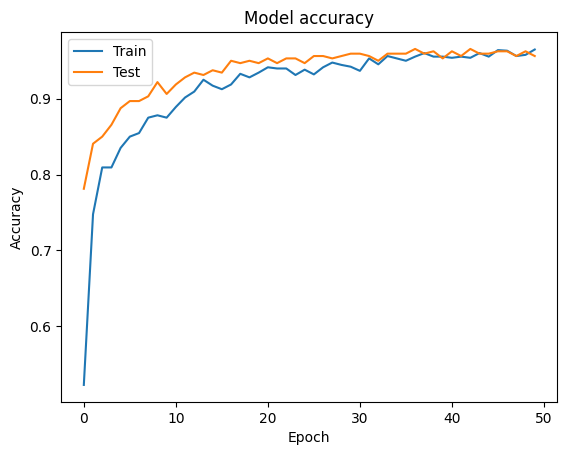

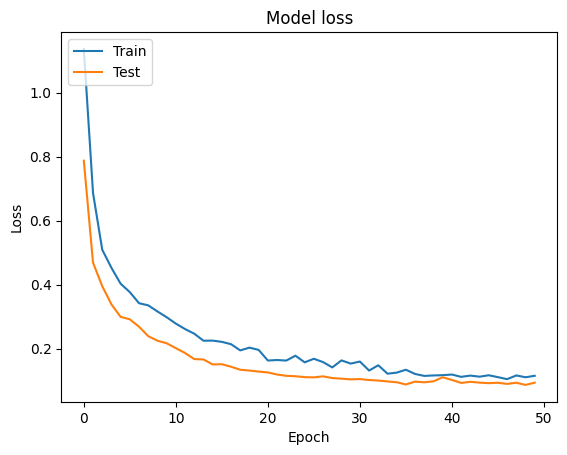

In [33]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


Save the model,scaler,label encoder

In [34]:
import joblib
from tensorflow.keras.models import save_model

# Save the Keras model
model.save("rice_disease_model.h5")

# Save the Scaler
joblib.dump(scaler, "scaler.pkl")

# Save the Label Encoder
joblib.dump(label_encoder, "label_encoder.pkl")

print("Model, scaler, and label encoder have been saved successfully!")


Model, scaler, and label encoder have been saved successfully!


to append back to dataset

In [11]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
import joblib

# Load model, scaler, and label encoder
model = load_model('rice_disease_model.h5')
scaler = joblib.load('scaler.pkl')
label_encoder = joblib.load('label_encoder.pkl')

# Define the function to handle incoming data and predict the disease
def predict_and_add_data(new_data):
    # Define the column names based on the dataset structure
    columns = ['Latitude', 'Longitude', 'Depth', 'Nitrogen (g/kg)', 'Phosphorus (mg/kg)', 'Potassium (cmol/kg)', 
               'pH', 'Temperature (°C)', 'Humidity (%)', 'Rainfall (mm)', 'Time of Day (Hour)', 'NDVI', 'Predicted Disease']
    
    # Ensure new data has all the required columns, and in the correct order
    new_data = {col: new_data.get(col, np.nan) for col in columns}
    
    # Preprocess the incoming data (the new data received)
    features = ['Nitrogen (g/kg)', 'Phosphorus (mg/kg)', 'Potassium (cmol/kg)', 'pH',
                'Temperature (°C)', 'Humidity (%)', 'Rainfall (mm)', 'Time of Day (Hour)', 'NDVI']
    
    input_data = np.array([[new_data[feature] for feature in features]])
    input_scaled = scaler.transform(input_data)  # Scale the input
    
    # Predict the disease label using the trained model
    predicted_class_probabilities = model.predict(input_scaled)  # Get prediction probabilities
    predicted_class = np.argmax(predicted_class_probabilities, axis=1)  # Get class with max probability
    
    # Decode the predicted label (disease type)
    predicted_label = label_encoder.inverse_transform(predicted_class)
    
    # Add the predicted disease to the new data
    new_data['Predicted Disease'] = predicted_label[0]
    
    # Load the existing dataset (rice_dataset.csv)
    df = pd.read_csv('rice_dataset.csv')  
    
    # Convert the new data (dict) to a DataFrame
    new_data_df = pd.DataFrame([new_data])
    
    # Concatenate the new data with the existing dataset
    df = pd.concat([df, new_data_df], ignore_index=True)
    
    # Save the updated dataset to the CSV
    df.to_csv('rice_dataset.csv', index=False)  # Save the updated dataset

    return predicted_label[0]

# Example input data received from the frontend
new_input_data = {
    "Latitude": 17.385,
    "Longitude": 78.4867,
    "Depth": "0-5 cm",
    "Nitrogen (g/kg)": 0.3,
    "Phosphorus (mg/kg)": 20,
    "Potassium (cmol/kg)": 1.5,
    "pH": 6.5,
    "Temperature (°C)": 28,
    "Humidity (%)": 85,
    "Rainfall (mm)": 50,
    "Time of Day (Hour)": 15,  # 3 PM
    "NDVI": 0.6
}

# Predict and add new data with label
predicted_disease = predict_and_add_data(new_input_data)
print(f"Predicted Disease: {predicted_disease}")


c:\Users\drish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted Disease: Suboptimal Growth


In [12]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
import joblib

# Load model, scaler, and label encoder
model = load_model('rice_disease_model.h5')
scaler = joblib.load('scaler.pkl')
label_encoder = joblib.load('label_encoder.pkl')

# Define the function to handle incoming data and predict the disease
def predict_and_add_data(new_data):
    # Define the column names based on the dataset structure
    columns = ['Latitude', 'Longitude', 'Depth', 'Nitrogen (g/kg)', 'Phosphorus (mg/kg)', 'Potassium (cmol/kg)', 
               'pH', 'Temperature (°C)', 'Humidity (%)', 'Rainfall (mm)', 'Time of Day (Hour)', 'NDVI', 'Predicted Disease']
    
    # Ensure new data has all the required columns, and in the correct order
    new_data = {col: new_data.get(col, np.nan) for col in columns}
    
    # Preprocess the incoming data (the new data received)
    features = ['Nitrogen (g/kg)', 'Phosphorus (mg/kg)', 'Potassium (cmol/kg)', 'pH',
                'Temperature (°C)', 'Humidity (%)', 'Rainfall (mm)', 'Time of Day (Hour)', 'NDVI']
    
    input_data = np.array([[new_data[feature] for feature in features]])
    input_scaled = scaler.transform(input_data)  # Scale the input
    
    # Predict the disease label using the trained model
    predicted_class_probabilities = model.predict(input_scaled)  # Get prediction probabilities
    predicted_class = np.argmax(predicted_class_probabilities, axis=1)  # Get class with max probability
    
    # Decode the predicted label (disease type)
    predicted_label = label_encoder.inverse_transform(predicted_class)
    
    # Add the predicted disease to the new data **before** NDVI
    new_data['Predicted Disease'] = predicted_label[0]
    
    # Reorder the columns so that 'Predicted Disease' comes before 'NDVI'
    new_data = {**new_data}  # Convert back to dictionary to handle reordering
    columns_order = [col for col in columns if col != 'Predicted Disease']
    columns_order.insert(columns_order.index('NDVI'), 'Predicted Disease')  # Insert 'Predicted Disease' before 'NDVI'
    
    # Reorder the new_data dictionary according to the correct column order
    new_data_reordered = {col: new_data[col] for col in columns_order}
    
    # Load the existing dataset (rice_dataset.csv)
    df = pd.read_csv('rice_dataset.csv')  
    
    # Convert the new data (dict) to a DataFrame
    new_data_df = pd.DataFrame([new_data_reordered])
    
    # Concatenate the new data with the existing dataset
    df = pd.concat([df, new_data_df], ignore_index=True)
    
    # Save the updated dataset to the CSV
    df.to_csv('rice_dataset.csv', index=False)  # Save the updated dataset

    return predicted_label[0]

# Example input data received from the frontend
new_input_data = {
    "Latitude": 17.385,
    "Longitude": 78.4867,
    "Depth": "0-5 cm",
    "Nitrogen (g/kg)": 0.3,
    "Phosphorus (mg/kg)": 20,
    "Potassium (cmol/kg)": 1.5,
    "pH": 6.5,
    "Temperature (°C)": 28,
    "Humidity (%)": 85,
    "Rainfall (mm)": 50,
    "Time of Day (Hour)": 15,  # 3 PM
    "NDVI": 0.6
}

# Predict and add new data with label
predicted_disease = predict_and_add_data(new_input_data)
print(f"Predicted Disease: {predicted_disease}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted Disease: Suboptimal Growth


c:\Users\drish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
